In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from os import getcwd 
print(getcwd())

c:\Users\jmert\Documents\W&M\BUAD5112\M3


In [15]:
data = pd.read_csv('ConstructionTimeSeriesDataV2.csv')
data.rename(columns={'Month-Year':'Date','Total Construction':'Total','Private Construction':'Private','Public Construction':'Public'},inplace=True)
data.Date = '1-'+data.Date
data.Date = pd.to_datetime(data.Date,dayfirst=True)
data.drop(['Month'],axis=1,inplace=True)

# fig,ax = plt.subplots()
# ax.plot(data.Private,label='Private')
# ax.plot(data.Public,label='Public')
# ax.set_xlabel('Year')
# ax.set_ylabel('Construction Spending')
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# fig.legend()

### Requirements

For each of the two data series:
- Compute the squared error for your model relative to the original data series for each month, and cumulatively as well.
- Compute a pandas column named R2X that shows the error of your model relative to the original data series, where X is replaced by either Public or Private for the respective analyses.
- Compute a pandas column named R2ErrorX that shows R2 relative to (divided by) the original data series.

Average Private Squared Error 71294653.93589342
Average Public Squared Error 14316799.922417827


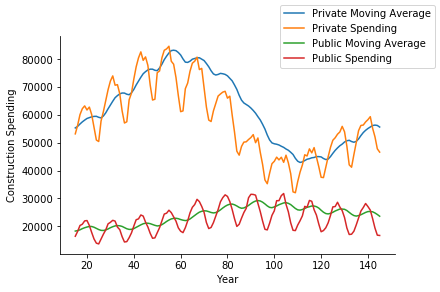

In [16]:
def prisqErr(row):
    return (row['Private'] - row['Pri_MovAvg'])**2
def pubsqErr(row):
    return (row['Public'] - row['Pub_MovAvg'])**2

data['Pri_MovAvg'] = np.NaN 
data['Pri_sqErr'] = np.NaN
data['Pub_MovAvg'] = np.NaN
data['Pub_sqErr'] = np.NaN

data.set_index('Date')

window = 14
window = window - window % 2

for i in range(window+1,len(data)):
    data.loc[data.index[i],'Pri_MovAvg'] = sum(data.iloc[range(i-window-1,i)]['Private'])/float(window)
    data.loc[data.index[i],'Pub_MovAvg'] = sum(data.iloc[range(i-window-1,i)]['Public'])/float(window)

# data['Pri_sqErr'] = (data.Private - data.Pri_MovAvg)**2
# data['Pub_sqErr'] = (data.Private - data.Pub_MovAvg)**2

data['Pri_sqErr'] = data.apply(prisqErr,axis='columns')
data['Pub_sqErr'] = data.apply(pubsqErr,axis='columns')

data.dropna(how='any',axis=0,inplace=True)

fig,ax = plt.subplots()
ax.plot(data.Pri_MovAvg,label='Private Moving Average')
ax.plot(data.Private,label='Private Spending')
ax.plot(data.Pub_MovAvg,label='Public Moving Average')
ax.plot(data.Public,label='Public Spending')
ax.set_xlabel('Year')
ax.set_ylabel('Construction Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
print('Average Private Squared Error',sum(data.Pri_sqErr)/len(data.index))
print('Average Public Squared Error', sum(data.Pub_sqErr)/len(data.index))
# data 

## Method 2
**Private Squared Error**

window | sqErr
--- | ---
2  | 914910975
4  | 278612959
6  | 164973401
8  | 119482220
10 | 90377681
12 | 72830695
14 < | 71294653
16 | 79832820

** Public Squared Error**

window | sqErr
--- | ---
2  | 144794847
4  | 55640270
6  | 40081705
8  | 30343827
10 | 21379236
12 | 15405036
14 < | 14316799
16 | 16808864


Average Private Residual:  -4065.959651035987
Average Public Residual:  -1302.6608505997817


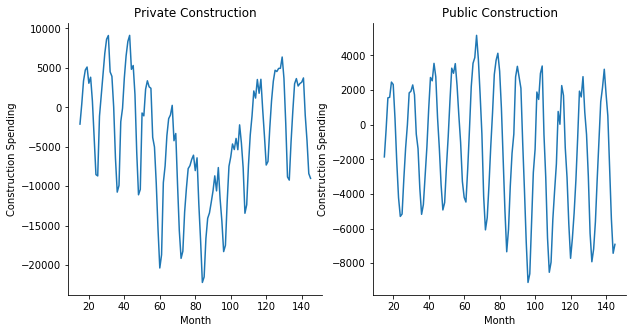

In [17]:
# Private R1
data['R1Private'] = data.Private - data.Pri_MovAvg
data['R1PrivateErr']= abs((data.Private - data.R1Private/data.Private))

# Public R1
data['R1Public'] = data.Public - data.Pub_MovAvg
data['R1PublicErr'] = abs((data.Public - data.R1Public/data.Public))
data.style.format({
    'Pri_MovAvg':'{:,.1f}'.format,
    'Pri_sqErr':'{:,.1f}'.format,
    'Pub_MovAvg':'{:,.1f}'.format,
    'Pub_sqErr':'{:,.1f}'.format,
    'R1Private':'{:,.1f}'.format,
    'R1PrivateErr':'{:,.3f}'.format,
    'R1Public':'{:,.1f}'.format,
    'R1PublicErr':'{:,.3f}'.format
})
# data
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(data.R1Private,label='Private Remainder After Trend')
axes[1].plot(data.R1Public,label='Public Remainder After Trend')
axes[0].set_title('Private Construction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Construction Spending')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].set_title('Public Construction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Construction Spending')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
print('Average Private Residual: ',sum(data.R1Private)/len(data))
print('Average Public Residual: ',sum(data.R1Public)/len(data))

In [18]:
# Private Max Corr
pri_maxCorr = 0.0
pri_period = np.NaN
for i in range(1,37):
    corr = data.R1Private.autocorr(lag=i)
    print('Correlation, lag',i,'  ',corr)
    if corr > pri_maxCorr:
        pri_maxCorr = corr
        pri_period = i
print('period = ',pri_period,'  Maximum Correlation (Private) = ',pri_maxCorr)

Correlation, lag 1    0.889118249185397
Correlation, lag 2    0.6795183012002465
Correlation, lag 3    0.4399918211902559
Correlation, lag 4    0.24729968801011898
Correlation, lag 5    0.1162485708025346
Correlation, lag 6    0.043791994437863795
Correlation, lag 7    0.079256792714192
Correlation, lag 8    0.1791210461467031
Correlation, lag 9    0.34597234949333705
Correlation, lag 10    0.5615534805220393
Correlation, lag 11    0.7460182086099442
Correlation, lag 12    0.8314708614710434
Correlation, lag 13    0.7133306924085807
Correlation, lag 14    0.5032324649321617
Correlation, lag 15    0.2598534112197559
Correlation, lag 16    0.059320906250831806
Correlation, lag 17    -0.08779250124054983
Correlation, lag 18    -0.1767073438549825
Correlation, lag 19    -0.15706604627978255
Correlation, lag 20    -0.07550529112622216
Correlation, lag 21    0.07478786805727156
Correlation, lag 22    0.2756345935842158
Correlation, lag 23    0.4534248501708658
Correlation, lag 24    0.532339

In [19]:
# Public Max Corr
pub_maxCorr = 0.0
pub_period = np.NaN
for i in range(1,37):
    corr = data.R1Public.autocorr(lag=i)
    print('Correlation, lag',i,'  ',corr)
    if corr > pub_maxCorr:
        pub_maxCorr = corr
        pub_period = i
print('period = ',pub_period,'  Maximum Correlation (Public) = ',pub_maxCorr)

Correlation, lag 1    0.8558336110901543
Correlation, lag 2    0.5152957400346849
Correlation, lag 3    0.061942124377643654
Correlation, lag 4    -0.38939343872277826
Correlation, lag 5    -0.7018483403358841
Correlation, lag 6    -0.8158732596586059
Correlation, lag 7    -0.7075691644655372
Correlation, lag 8    -0.39473392659500345
Correlation, lag 9    0.051010520394330836
Correlation, lag 10    0.4925805286170935
Correlation, lag 11    0.8296975069153772
Correlation, lag 12    0.967336443083039
Correlation, lag 13    0.8354938783743936
Correlation, lag 14    0.5114288810699186
Correlation, lag 15    0.05835667755071702
Correlation, lag 16    -0.39019034604638114
Correlation, lag 17    -0.703597320216597
Correlation, lag 18    -0.8228046628595127
Correlation, lag 19    -0.7176951901437275
Correlation, lag 20    -0.40826232924565214
Correlation, lag 21    0.03075353761063641
Correlation, lag 22    0.46836008280422586
Correlation, lag 23    0.8028471452812174
Correlation, lag 24    0

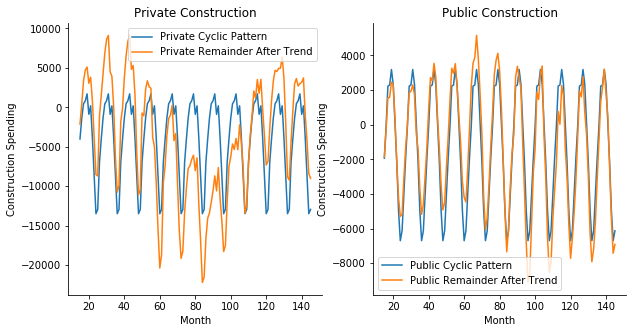

In [49]:
pri_cycleLen,pub_cycleLen = 12,pub_period
pri_avg = []
pub_avg = []
pri_numCycles = int(len(data)/pri_cycleLen + 0.5)
pub_numCycles = int(len(data)/pub_cycleLen + 0.5)
for j in range(pri_cycleLen):
    if j + (pri_numCycles-1) * pri_cycleLen < len(data):
        d = data.iloc[range(j,j + (pri_numCycles-1) * pri_cycleLen+1,pri_cycleLen)]['R1Private']
        # print(j,d)
        pri_avg.append(sum(d)/len(d))
    else:
        d = data.iloc[range(j,j + (pri_numCycles-2) * pri_cycleLen+1,pri_cycleLen)]['R1Private']
        pri_avg.append(sum(d)/len(d))

for j in range(pub_cycleLen):
    if j + (pub_numCycles-1) * pub_cycleLen < len(data):
        d = data.iloc[range(j,j + (pub_numCycles-1) * pub_cycleLen+1,pub_cycleLen)]['R1Public']
        # print(j,d)
        pub_avg.append(sum(d)/len(d))
    else:
        d = data.iloc[range(j,j + (pub_numCycles-2) * pub_cycleLen+1,pub_cycleLen)]['R1Public']
        pub_avg.append(sum(d)/len(d))

data['pri_C'] = np.NaN
data['pub_C'] = np.NaN
for i in range(len(data)):
    data.loc[data.index[i],'pri_C'] = pri_avg[i % pri_cycleLen]
    data.loc[data.index[i],'pub_C'] = pub_avg[i % pub_cycleLen]

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(data.pri_C,label='Private Cyclic Pattern')
axes[0].plot(data.R1Private,label='Private Remainder After Trend')
axes[1].plot(data.pub_C,label='Public Cyclic Pattern')
axes[1].plot(data.R1Public,label='Public Remainder After Trend')
axes[0].set_title('Private Construction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Construction Spending')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend()
axes[1].set_title('Public Construction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Construction Spending')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend()

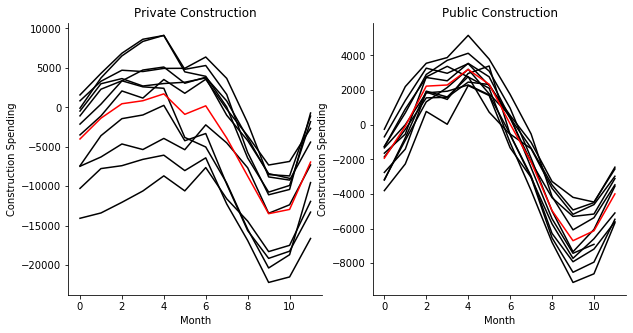

In [51]:
pri_period = 12
pri_cycles = [data.iloc[range(i*pri_period,min((i+1)*pri_period,len(data)))]['R1Private'] for i in range(pri_numCycles)]
pub_cycles = [data.iloc[range(i*pub_period,min((i+1)*pub_period,len(data)))]['R1Public'] for i in range(pub_numCycles)]

fig,axes = plt.subplots(1,2,figsize=(10,5))
for i in range(len(pri_cycles)):
    axes[0].plot(pri_cycles[i].values,label='Cycle '+str(i),c='k')
for i in range(len(pub_cycles)):
    axes[1].plot(pub_cycles[i].values,label='Cycle '+str(i),c='k')
axes[0].plot(pri_avg,label='Private Average Cycle',c='r')
axes[1].plot(pub_avg,label='Public Average Cycle',c='r')
axes[0].set_title('Private Construction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Construction Spending')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
# axes[0].legend()
axes[1].set_title('Public Construction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Construction Spending')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
# axes[1].legend()

Average Private Error:  0.08517701179727358
Average Public Error:  0.044733431033950506


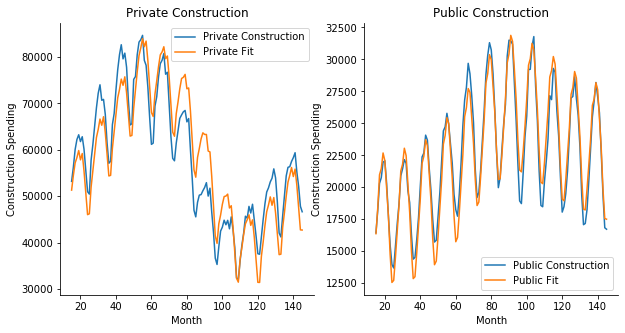

In [52]:
data['R2Private'] = data.R1Private - data.pri_C
data['R2ErrPrivate'] = abs(data.R2Private/data.Private)
data['pri_fit'] = data.Pri_MovAvg + data.pri_C
data['R2Public'] = data.R1Public - data.pub_C
data['R2ErrPublic'] = abs(data.R2Public/data.Public)
data['pub_fit'] = data.Pub_MovAvg + data.pub_C
print('Average Private Error: ',sum(data.R2ErrPrivate)/len(data))
print('Average Public Error: ',sum(data.R2ErrPublic)/len(data))

fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(data.Private,label='Private Construction')
axes[0].plot(data.pri_fit,label='Private Fit')
axes[1].plot(data.Public,label='Public Construction')
axes[1].plot(data.pub_fit,label='Public Fit')
axes[0].set_title('Private Construction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Construction Spending')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend()
axes[1].set_title('Public Construction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Construction Spending')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend()

Private Correlation, lag 1     0.9725993841342541
Private Correlation, lag 2     0.9414708375871478
Private Correlation, lag 3     0.903250471595238
Private Correlation, lag 4     0.8676916325081736
Private Correlation, lag 5     0.827610728447954
Private Correlation, lag 6     0.795076641358359
Private Correlation, lag 7     0.7730188397913379
Private Correlation, lag 8     0.7570109366788557
Private Correlation, lag 9     0.7372898950688319
Private Correlation, lag 10     0.7216703867985769
Private Correlation, lag 11     0.7016595953587552
Private Correlation, lag 12     0.6824242488200327
Private Correlation, lag 13     0.6367395707470294
Private Correlation, lag 14     0.5917438708775244
Private Correlation, lag 15     0.5372257021210852
Private Correlation, lag 16     0.4866659034606425
Private Correlation, lag 17     0.4325739881306705
Private Correlation, lag 18     0.3851102393782009
Private Correlation, lag 19     0.3483104536108381
Private Correlation, lag 20     0.311472600

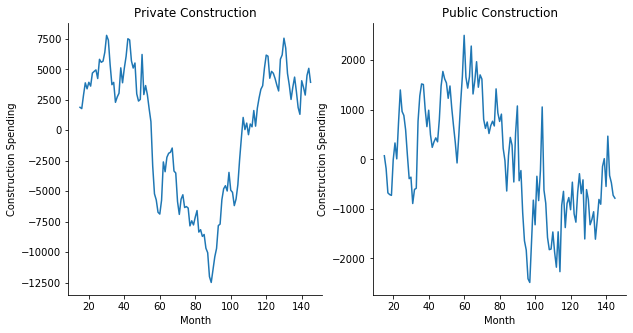

In [54]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].plot(data.R2Private,label='Private Remainder after Trend/Cyclical')
axes[1].plot(data.R2Public,label='Public Remainder after Trend/Cyclical')
axes[0].set_title('Private Construction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Construction Spending')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[1].set_title('Public Construction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Construction Spending')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

maxCorr = 0.0
pri_period = np.NaN
pub_period = np.NaN
for i in range(1,37):
    corr = data.R2Private.autocorr(lag=i)
    print('Private Correlation, lag',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        pri_period = i
print('period = ',pri_period,'   Private Maximum Correlation = ',maxCorr,'\n')
maxCorr = 0.0
for i in range(1,37):
    corr = data.R2Public.autocorr(lag=i)
    print('Public Correlation, lag',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        pub_period = i
print('period = ',pub_period,'   Public Maximum Correlation = ',maxCorr)

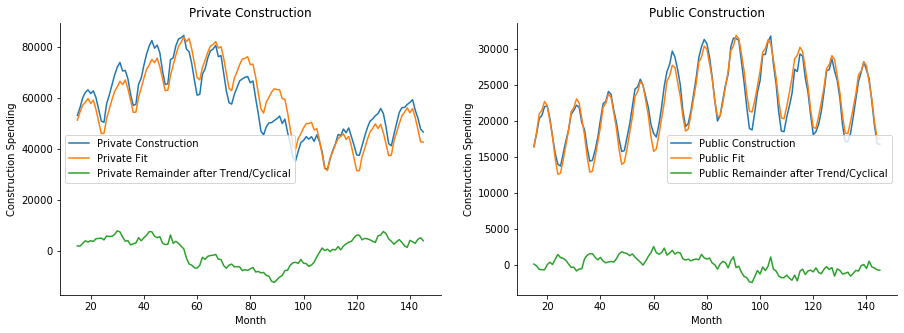

In [55]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(data.Private,label='Private Construction')
axes[0].plot(data.pri_fit,label='Private Fit')
axes[0].plot(data.R2Private,label='Private Remainder after Trend/Cyclical')
axes[1].plot(data.Public,label='Public Construction')
axes[1].plot(data.pub_fit,label='Public Fit')
axes[1].plot(data.R2Public,label='Public Remainder after Trend/Cyclical')
axes[0].set_title('Private Construction')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Construction Spending')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)
axes[0].legend()
axes[1].set_title('Public Construction')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Construction Spending')
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[1].legend()